In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier


## _K-NEAREST NEIGHBOURS_

In [27]:
data=pd.read_csv(r"C:\Users\Admin\Desktop\DS_Assignments\Assignment_16-KNN\KNN\zoo.csv")
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### 1.Analyse the data using the visualizations

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [29]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


#### finding missing value

In [30]:
data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [52]:
# converting categorical to numerical
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


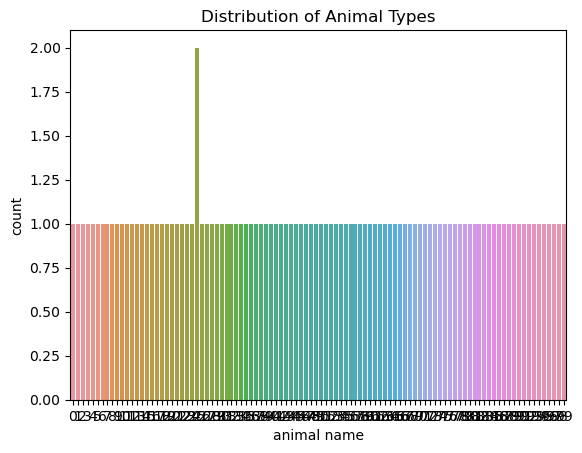

In [53]:
# Visualize the distribution of the target variable
sns.countplot(x='animal name', data=data)
plt.title('Distribution of Animal Types')
plt.show()


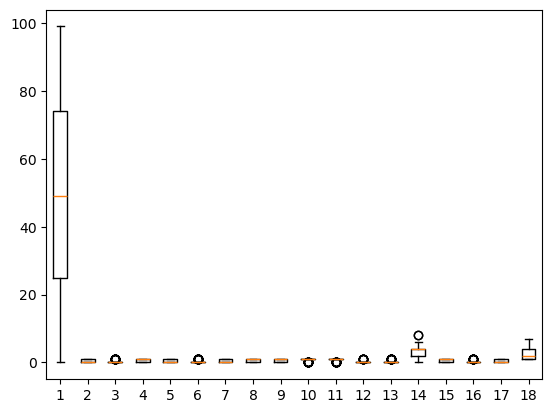

In [54]:
plt.boxplot(data)
plt.show()           

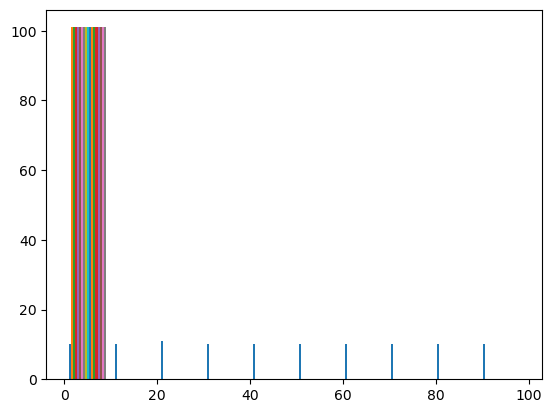

In [58]:
# Pairplot to visualize relationships between features
plt.hist(data)
plt.show()

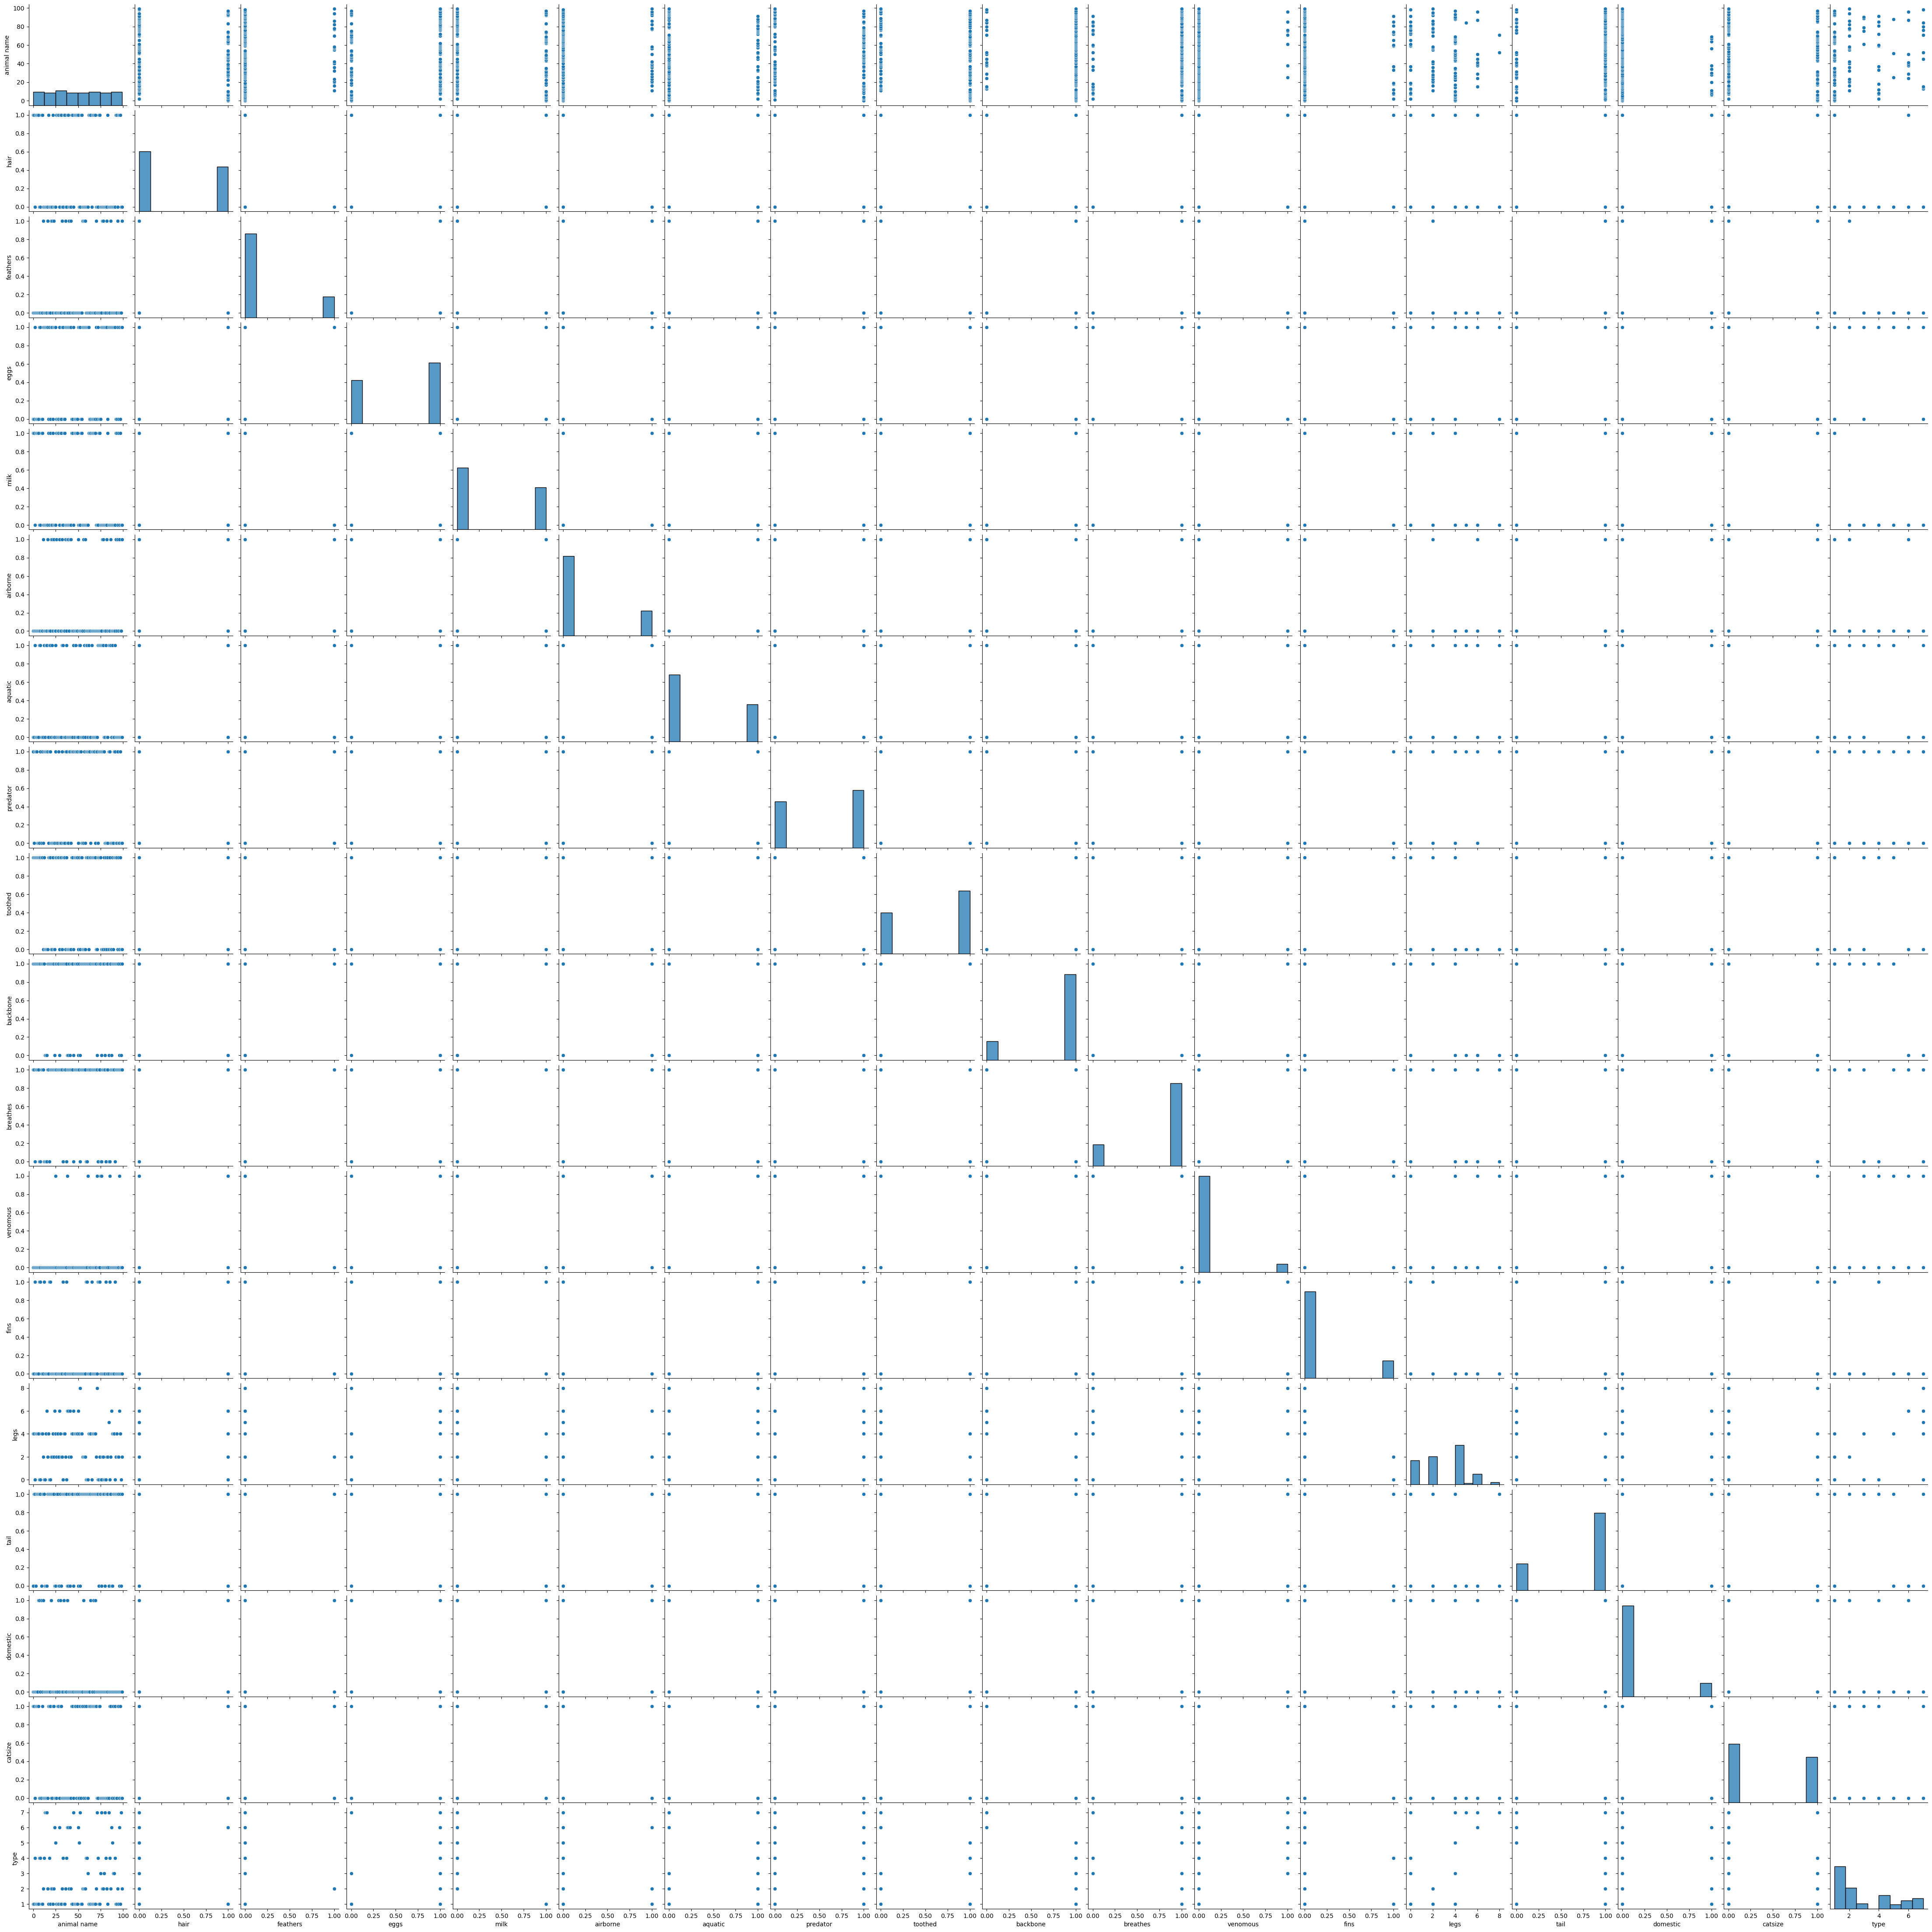

In [59]:
sns.pairplot(data)


### Step 2: Preprocess the Data

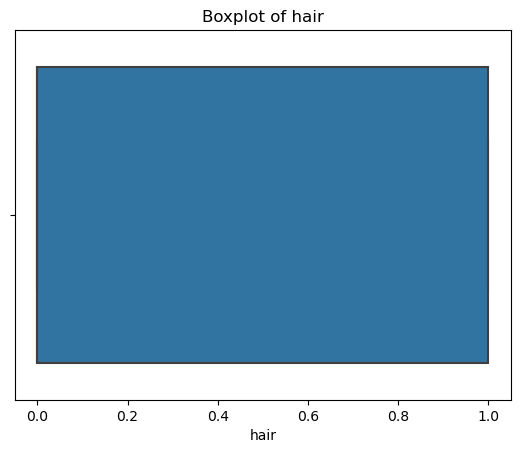

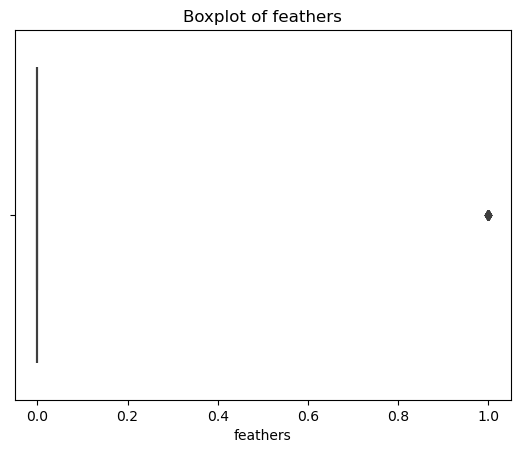

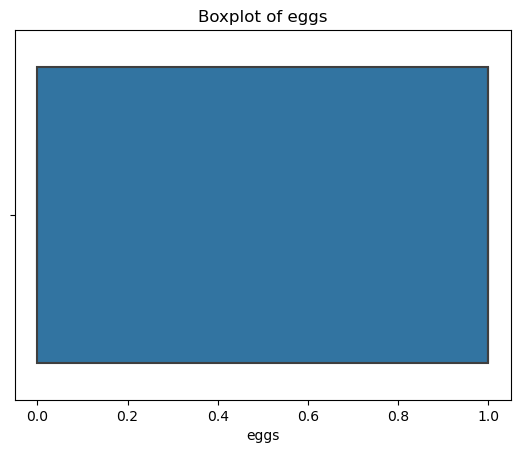

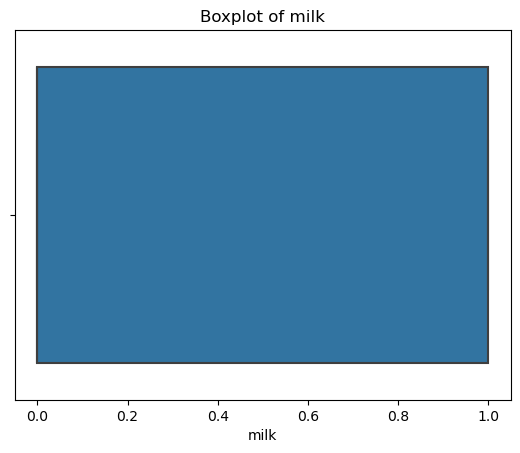

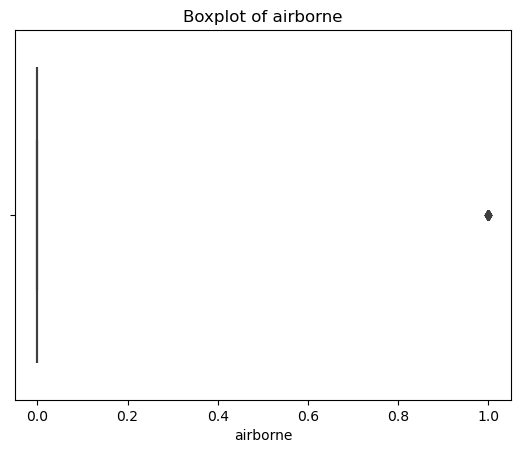

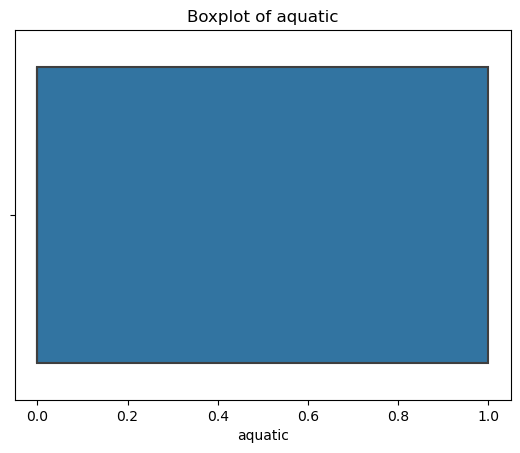

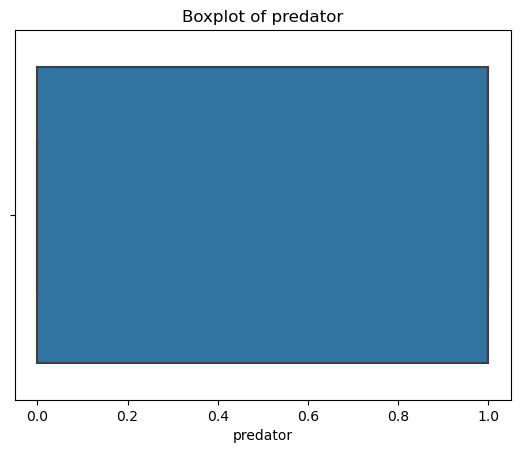

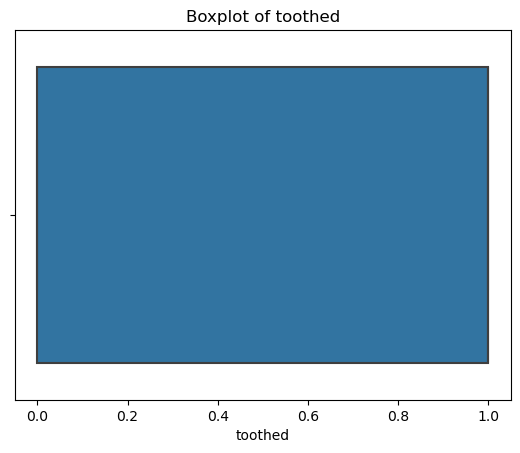

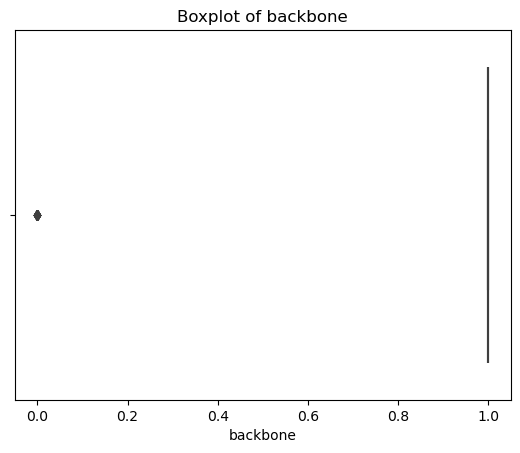

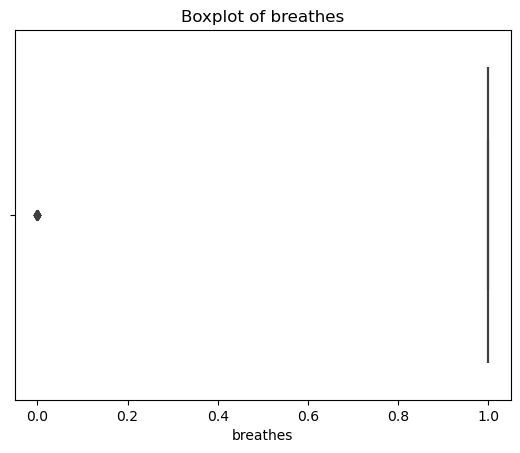

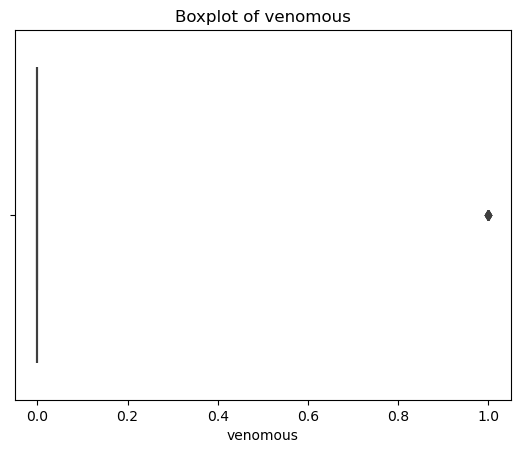

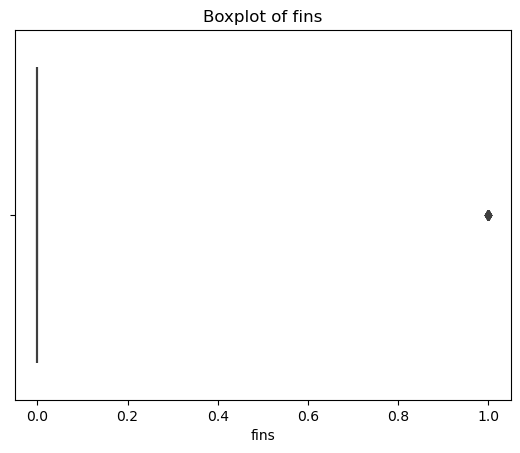

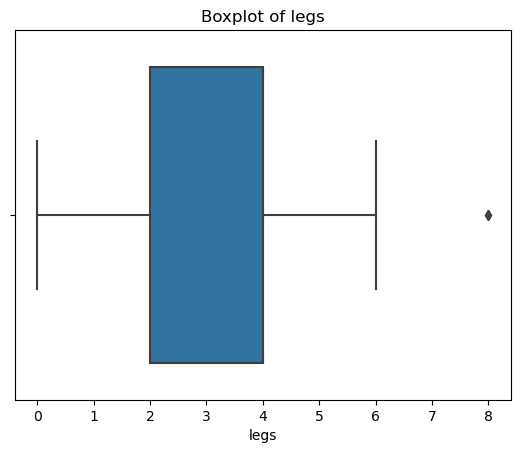

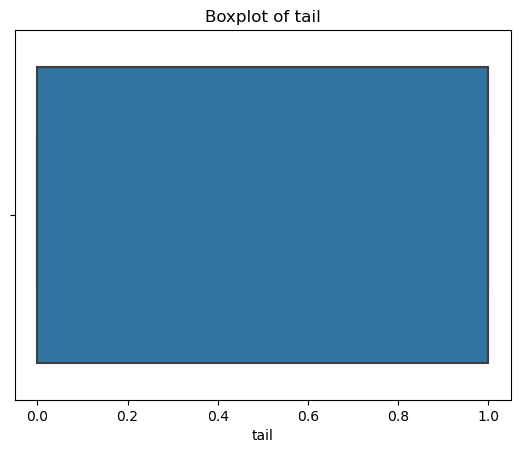

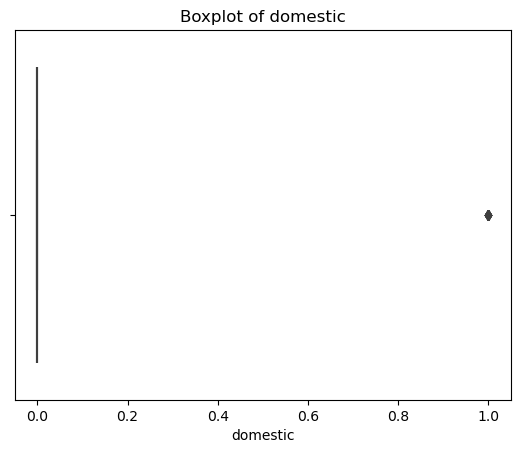

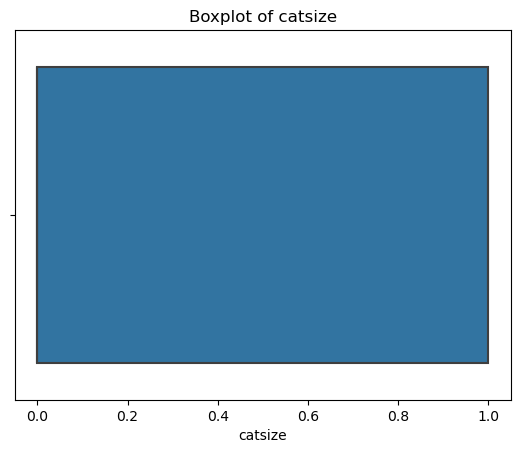

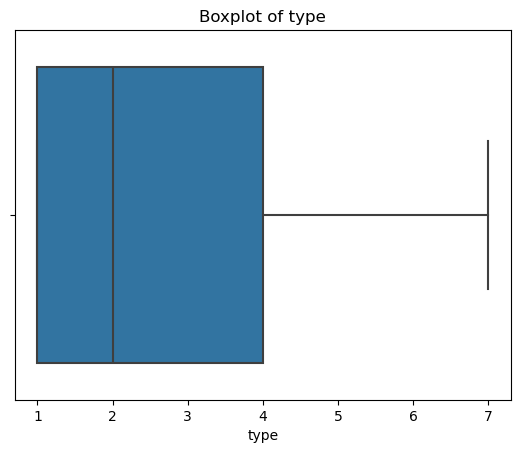

In [8]:
# Visualize box plots to identify outliers
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


In [9]:
# Remove outliers (example using IQR method)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\Admin\AppData\Local\Temp\ipykernel_11916\2045022941.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11916\2045022941.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11916\2045022941.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [10]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,33.000000,33.0,33.000000,33.000000,33.0,33.000000,33.000000,33.000000,33.0,33.0,33.0,33.0,33.000000,33.000000,33.0,33.000000,33.000000
mean,0.818182,0.0,0.212121,0.818182,0.0,0.151515,0.606061,0.939394,1.0,1.0,0.0,0.0,3.696970,0.848485,0.0,0.696970,1.545455
std,0.391675,0.0,0.415149,0.391675,0.0,0.364110,0.496198,0.242306,0.0,0.0,0.0,0.0,0.883348,0.364110,0.0,0.466694,1.252271
min,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.000000
25%,1.000000,0.0,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,1.0,1.0,0.0,0.0,4.000000,1.000000,0.0,0.000000,1.000000
50%,1.000000,0.0,0.000000,1.000000,0.0,0.000000,1.000000,1.000000,1.0,1.0,0.0,0.0,4.000000,1.000000,0.0,1.000000,1.000000
75%,1.000000,0.0,0.000000,1.000000,0.0,0.000000,1.000000,1.000000,1.0,1.0,0.0,0.0,4.000000,1.000000,0.0,1.000000,1.000000
max,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.0,1.0,0.0,0.0,4.000000,1.000000,0.0,1.000000,5.000000


### Checking the correlation of features using Heat map

C:\Users\Admin\AppData\Local\Temp\ipykernel_11916\1552416357.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matirx=data.corr()


(17.5, -0.5)

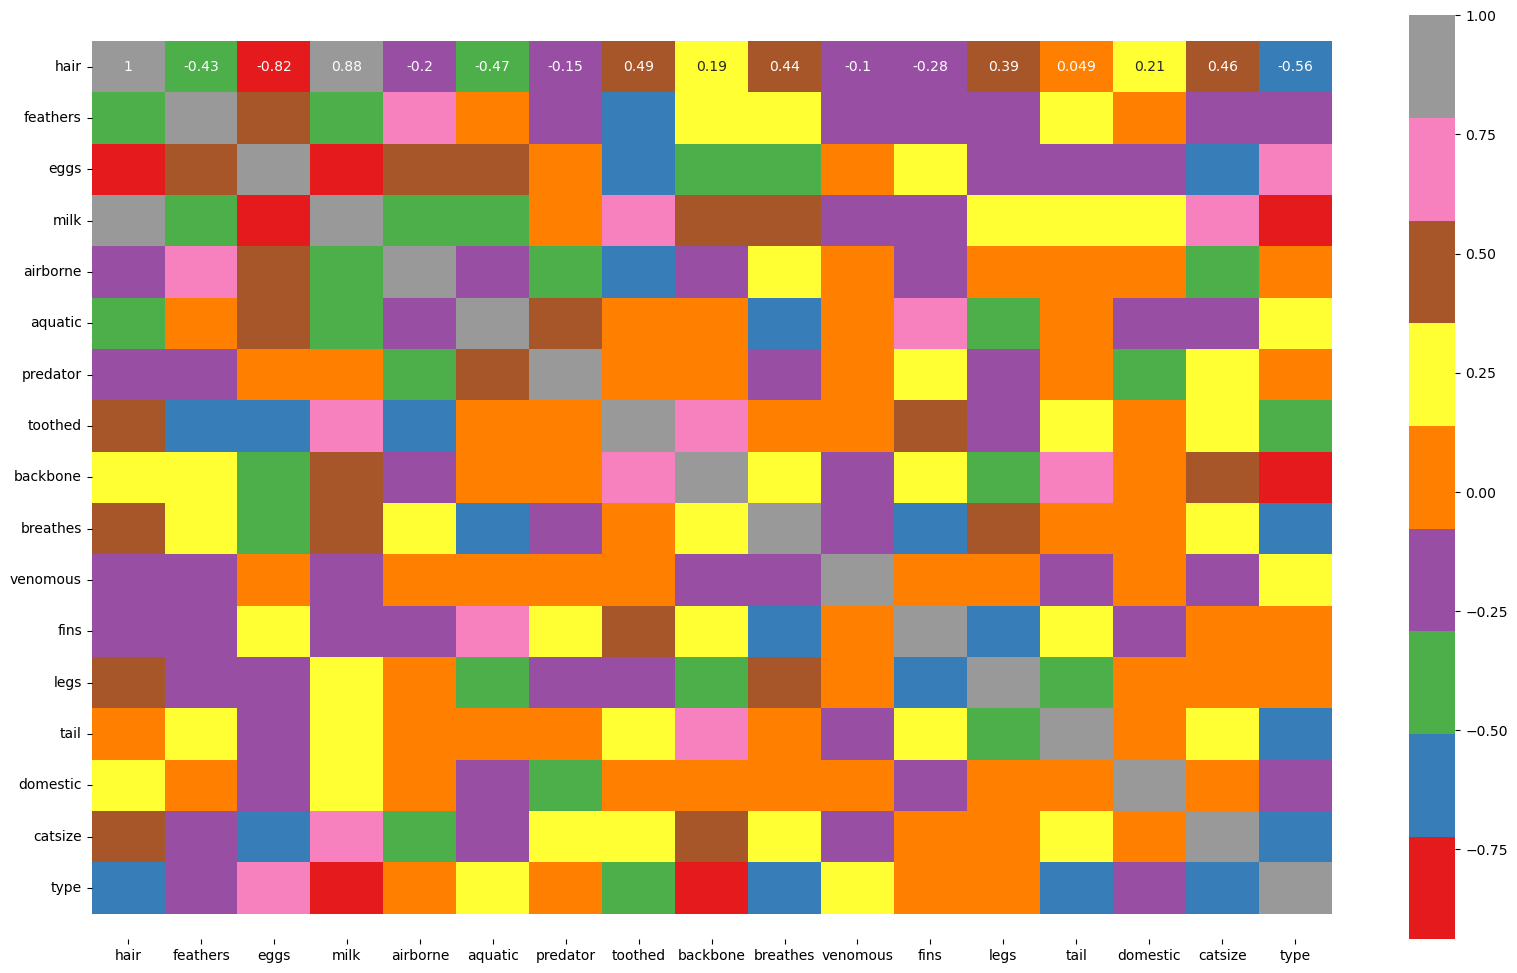

In [38]:
corr_matirx=data.corr()
plt.figure(figsize=(20,12))
ax = sns.heatmap(corr_matirx, annot = True, cmap="Set1")
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)

### Step 3: Split the Dataset into Training and Testing Sets

In [60]:
from sklearn.model_selection import train_test_split

x = data.iloc[:,:-1]  # Features
y = data.iloc[:,-1]# Target variable

# Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

### Step 4: Implement the K-Nearest Neighbours Algorithm


In [62]:
from sklearn.neighbors import KNeighborsClassifier

# Choose the value of k (number of neighbors)
k = 5  

knn= KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


KNeighborsClassifier()

### Step 5: Choose an Appropriate Distance Metric and Value for K

In [63]:
y_pred=knn.predict(x_train)
y_pred

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 3, 2, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1], dtype=int64)

In [64]:
from sklearn.metrics import accuracy_score,classification_report 
print(classification_report(y_pred,y_train))


              precision    recall  f1-score   support

           1       1.00      0.42      0.59        69
           2       0.28      0.83      0.42         6
           3       0.00      0.00      0.00         4
           4       0.09      1.00      0.17         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.44        80
   macro avg       0.20      0.32      0.17        80
weighted avg       0.88      0.44      0.54        80



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
print(accuracy_score(y_pred,y_train))

0.4375


### Interview Questions:

#### 1. What are the key hyperparameters in KNN?

In the K-Nearest Neighbors (KNN) algorithm, hyperparameters are parameters that are set prior to the training process and are not learned from the data. The key hyperparameters in KNN are;Number of neighbors (k),Distance metric,Weights,Algorithm,Leaf size

#### 2. What distance metrics can be used in KNN?

 In K-Nearest Neighbors (KNN), distance metrics are used to measure the similarity or dissimilarity between data points. Several distance metrics can be employed in KNN, depending on the nature of the data and the problem domain. Some common distance metrics used in KNN include: Euclidean distance,Manhattan distance (City block distance or L1 distance),Minkowski distance,Chebyshev distance,Cosine similarity